In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import keras
from keras.models import Sequential
from keras.layers import *
from keras.models import Model
from keras import Input, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score
from keras.utils.vis_utils import plot_model

In [2]:
neu_encoded = pd.read_csv('../input/car-price-estimation-ai-data/neu_encoded.csv').drop('Unnamed: 0',axis=1)
neu_encoded.head()

,brand,color,gear,year,body,loc,usage,price
0,26,6,1,21,0,6,55000.0,70000000.0
1,12,0,1,16,3,5,40000.0,34000000.0
2,24,23,1,8,2,5,300000.0,36500000.0
3,19,15,1,10,3,2,250.0,27200000.0
4,19,10,1,11,2,7,277.0,30000000.0


In [3]:
scaler = StandardScaler()

In [4]:
neu_encoded[['brand','color','gear','year','body','loc','usage']] = scaler.fit_transform(neu_encoded[['brand','color','gear','year','body','loc','usage']])

In [5]:
sample = neu_encoded.sample(frac=0.3)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(sample.drop('price',axis=1),sample['price'],test_size=0.33, random_state=42)

In [7]:
x_train

,brand,color,gear,year,body,loc,usage
7936,-1.526972,-0.225611,0.148077,0.692671,-0.962068,0.298753,-0.200720
2626,-0.845441,1.512516,0.148077,0.318828,-0.962068,1.472570,-0.913281
2217,-0.572829,-2.658989,0.148077,-0.055015,1.731122,1.081297,1.498032
8848,-0.027604,-0.225611,0.148077,0.131907,1.731122,-1.266336,-0.858107
8024,-1.935891,-0.051798,0.148077,1.066514,-0.962068,-0.483792,-0.910778
...,...,...,...,...,...,...,...
3219,1.062845,-0.225611,0.148077,-0.055015,1.731122,-0.483792,0.120937
1166,-1.526972,-0.051798,0.148077,1.253435,-0.962068,0.298753,-0.910778
8606,-1.663278,-0.225611,0.148077,0.318828,-0.962068,1.081297,0.342077
737,-2.344809,-0.225611,0.148077,1.253435,-0.962068,-0.483792,-0.914397


In [8]:
Model1 = Sequential()
Model1.add(Dense(2,input_shape=(7,),activation='relu'))
Model1.add(Dense(1))
Model1.compile(loss='mae',optimizer='adam')
Model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 537us/step - loss: 58898206.9746 - val_loss: 57692256.1563
Epoch 2/50
2286/2286 [==============================] - 0s 102us/step - loss: 58898206.4637 - val_loss: 57692256.1563
Epoch 3/50
2286/2286 [==============================] - 0s 110us/step - loss: 58898206.5862 - val_loss: 57692256.1563
Epoch 4/50
2286/2286 [==============================] - 0s 102us/step - loss: 58898206.0192 - val_loss: 57692256.0426
Epoch 5/50
2286/2286 [==============================] - 0s 101us/step - loss: 58898206.6807 - val_loss: 57692255.4742
Epoch 6/50
2286/2286 [==============================] - 0s 104us/step - loss: 58898205.7323 - val_loss: 57692254.5648
Epoch 7/50
2286/2286 [==============================] - 0s 103us/step - loss: 58898204.7069 - val_loss: 57692254.1101
Epoch 8/50
2286/2286 [==============================] - 0s 103us/step - loss: 58898203.9965 - val_loss: 57692252.4050
Epoch 9/

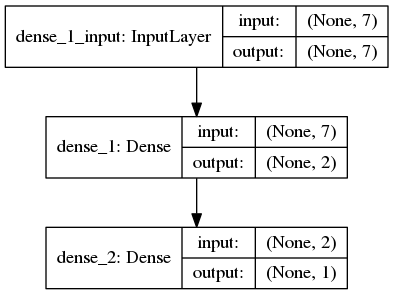

In [72]:
plot_model(Model1,show_shapes=True)

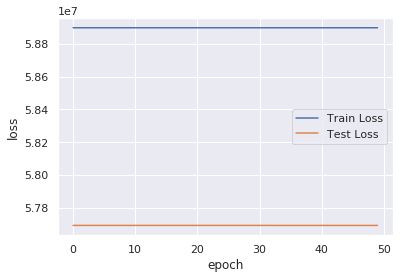

In [9]:
plt.plot(np.arange(50),Model1.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model1.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [10]:
print('Best Loss =',min(Model1.history.history['loss']))
print('Best Validation Loss =',min(Model1.history.history['val_loss']))


Best Loss = 58898115.06911636
Best Validation Loss = 57692162.955595024


In [11]:
Model2 = Sequential()
Model2.add(Dense(20,input_shape=(7,),activation='relu'))
Model2.add(Dense(1))
Model2.compile(loss='mae',optimizer='adam')
Model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 145us/step - loss: 58898206.3482 - val_loss: 57692256.1563
Epoch 2/50
2286/2286 [==============================] - 0s 97us/step - loss: 58898206.1977 - val_loss: 57692255.7016
Epoch 3/50
2286/2286 [==============================] - 0s 96us/step - loss: 58898205.4418 - val_loss: 57692253.8828
Epoch 4/50
2286/2286 [==============================] - 0s 101us/step - loss: 58898202.8976 - val_loss: 57692249.7478
Epoch 5/50
2286/2286 [==============================] - 0s 99us/step - loss: 58898199.4121 - val_loss: 57692247.5879
Epoch 6/50
2286/2286 [==============================] - 0s 94us/step - loss: 58898197.5363 - val_loss: 57692244.8171
Epoch 7/50
2286/2286 [==============================] - 0s 95us/step - loss: 58898193.7288 - val_loss: 57692241.6341
Epoch 8/50
2286/2286 [==============================] - 0s 101us/step - loss: 58898190.0472 - val_loss: 57692237.7691
Epoch 9/50
22

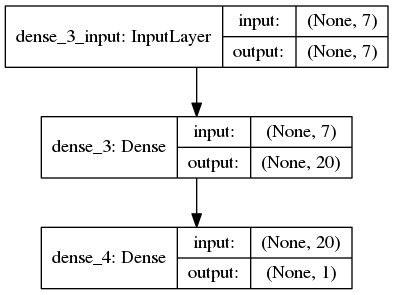

In [75]:
plot_model(Model2,show_shapes=True)

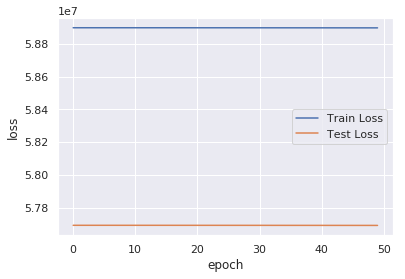

In [12]:
plt.plot(np.arange(50),Model2.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model2.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [14]:
print('Best Loss =',min(Model2.history.history['loss']))
print('Best Validation Loss =',min(Model2.history.history['val_loss']))

Best Loss = 58897471.25809274
Best Validation Loss = 57691523.651865005


In [15]:
Model3 = Sequential()
Model3.add(Dense(100,input_shape=(7,),activation='relu'))
Model3.add(Dense(1))
Model3.compile(loss='mae',optimizer='adam')
Model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 142us/step - loss: 58898206.4532 - val_loss: 57692255.5879
Epoch 2/50
2286/2286 [==============================] - 0s 101us/step - loss: 58898202.9851 - val_loss: 57692248.9520
Epoch 3/50
2286/2286 [==============================] - 0s 100us/step - loss: 58898196.4409 - val_loss: 57692243.1119
Epoch 4/50
2286/2286 [==============================] - 0s 109us/step - loss: 58898189.8093 - val_loss: 57692233.3357
Epoch 5/50
2286/2286 [==============================] - 0s 96us/step - loss: 58898178.7542 - val_loss: 57692222.3375
Epoch 6/50
2286/2286 [==============================] - 0s 99us/step - loss: 58898163.7865 - val_loss: 57692204.4050
Epoch 7/50
2286/2286 [==============================] - 0s 98us/step - loss: 58898145.6483 - val_loss: 57692184.4263
Epoch 8/50
2286/2286 [==============================] - 0s 115us/step - loss: 58898122.8416 - val_loss: 57692160.8384
Epoch 9/50


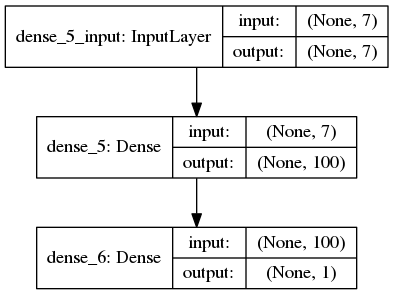

In [76]:
plot_model(Model3,show_shapes=True)

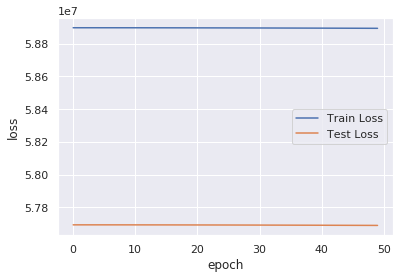

In [18]:
plt.plot(np.arange(50),Model3.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model3.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [19]:
print('Best Loss =',min(Model3.history.history['loss']))
print('Best Validation Loss =',min(Model3.history.history['val_loss']))


Best Loss = 58894687.68153981
Best Validation Loss = 57688721.32149201


In [20]:
Model4 = Sequential()
Model4.add(Dense(10,input_shape=(7,),activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(10,activation='relu'))
Model4.add(Dense(1))
Model4.compile(loss='mae',optimizer='adam')
Model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 370us/step - loss: 58898205.8898 - val_loss: 57692256.1563
Epoch 2/50
2286/2286 [==============================] - 0s 177us/step - loss: 58898195.1461 - val_loss: 57692183.4316
Epoch 3/50
2286/2286 [==============================] - 0s 197us/step - loss: 58895310.1032 - val_loss: 57677103.1901
Epoch 4/50
2286/2286 [==============================] - 0s 210us/step - loss: 58652222.7682 - val_loss: 56690867.5382
Epoch 5/50
2286/2286 [==============================] - 0s 181us/step - loss: 50768475.0954 - val_loss: 31983227.1403
Epoch 6/50
2286/2286 [==============================] - 0s 176us/step - loss: 25300348.3465 - val_loss: 22330837.1368
Epoch 7/50
2286/2286 [==============================] - 0s 178us/step - loss: 22546230.5634 - val_loss: 21186122.2451
Epoch 8/50
2286/2286 [==============================] - 0s 180us/step - loss: 21646854.6360 - val_loss: 20555290.6288
Epoch 9/

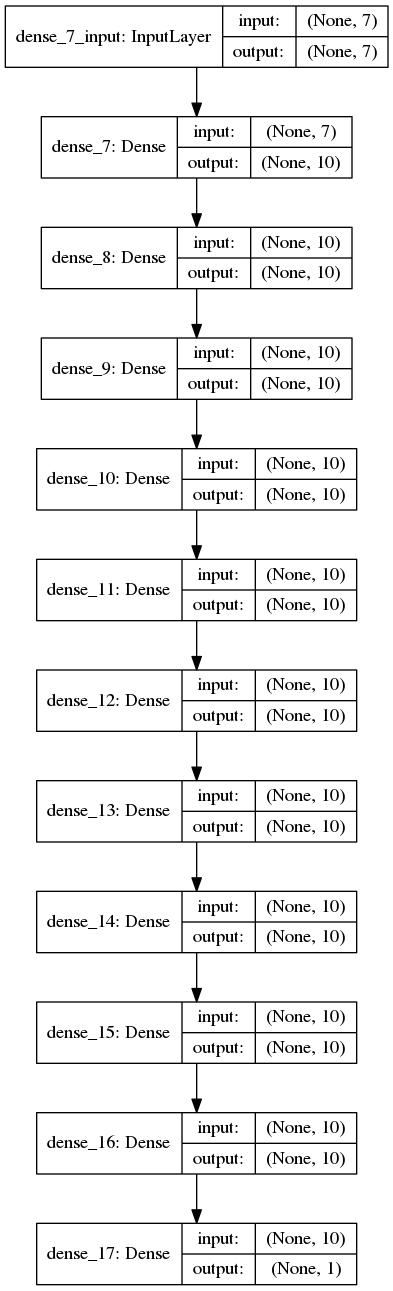

In [77]:
plot_model(Model4,show_shapes=True)

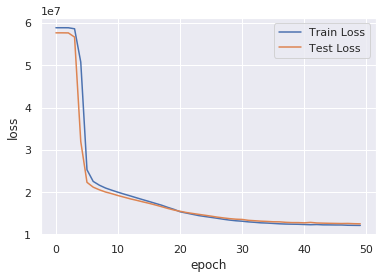

In [21]:
plt.plot(np.arange(50),Model4.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model4.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [22]:
print('Best Loss =',min(Model4.history.history['loss']))
print('Best Validation Loss =',min(Model4.history.history['val_loss']))


Best Loss = 12136552.392825896
Best Validation Loss = 12514539.126110123


In [23]:
Model5 = Sequential()
Model5.add(Dense(100,input_shape=(7,),activation='relu'))
Model5.add(Dense(100,activation='relu'))
Model5.add(Dense(1))
Model5.compile(loss='mae',optimizer='adam')
Model5.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 166us/step - loss: 58898199.5836 - val_loss: 57692232.2274
Epoch 2/50
2286/2286 [==============================] - 0s 103us/step - loss: 58898130.1907 - val_loss: 57692093.3854
Epoch 3/50
2286/2286 [==============================] - 0s 119us/step - loss: 58897863.2896 - val_loss: 57691669.5275
Epoch 4/50
2286/2286 [==============================] - 0s 114us/step - loss: 58897214.6492 - val_loss: 57690772.6750
Epoch 5/50
2286/2286 [==============================] - 0s 104us/step - loss: 58895993.9878 - val_loss: 57689224.7957
Epoch 6/50
2286/2286 [==============================] - 0s 102us/step - loss: 58894021.4768 - val_loss: 57686845.7691
Epoch 7/50
2286/2286 [==============================] - 0s 105us/step - loss: 58891130.3202 - val_loss: 57683484.4192
Epoch 8/50
2286/2286 [==============================] - 0s 113us/step - loss: 58887162.0157 - val_loss: 57678999.4316
Epoch 9/

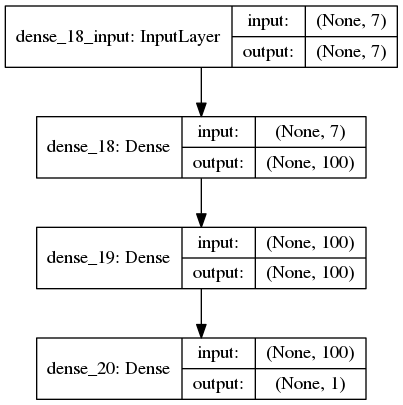

In [78]:
plot_model(Model5,show_shapes=True)

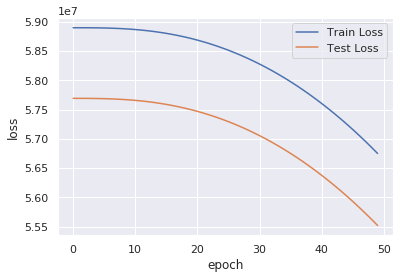

In [25]:
plt.plot(np.arange(50),Model5.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model5.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [26]:
print('Best Loss =',min(Model5.history.history['loss']))
print('Best Validation Loss =',min(Model5.history.history['val_loss']))


Best Loss = 56751270.96062992
Best Validation Loss = 55521739.76554174


In [27]:
Model6 = Sequential()
Model6.add(Dense(100,input_shape=(7,),activation='relu'))
Model6.add(Dense(100,activation='relu'))
Model6.add(Dense(100,activation='relu'))
Model6.add(Dense(1))
Model6.compile(loss='mae',optimizer='adam')
Model6.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 184us/step - loss: 58898167.5031 - val_loss: 57692055.1332
Epoch 2/50
2286/2286 [==============================] - 0s 117us/step - loss: 58896737.5958 - val_loss: 57687988.8739
Epoch 3/50
2286/2286 [==============================] - 0s 135us/step - loss: 58885116.5494 - val_loss: 57664652.3055
Epoch 4/50
2286/2286 [==============================] - 0s 133us/step - loss: 58840029.8933 - val_loss: 57590837.6128
Epoch 5/50
2286/2286 [==============================] - 0s 120us/step - loss: 58722189.7778 - val_loss: 57419743.1758
Epoch 6/50
2286/2286 [==============================] - 0s 195us/step - loss: 58476998.5302 - val_loss: 57089740.6750
Epoch 7/50
2286/2286 [==============================] - 0s 125us/step - loss: 58038224.6299 - val_loss: 56531174.0675
Epoch 8/50
2286/2286 [==============================] - 0s 113us/step - loss: 57333512.2765 - val_loss: 55662189.0728
Epoch 9/

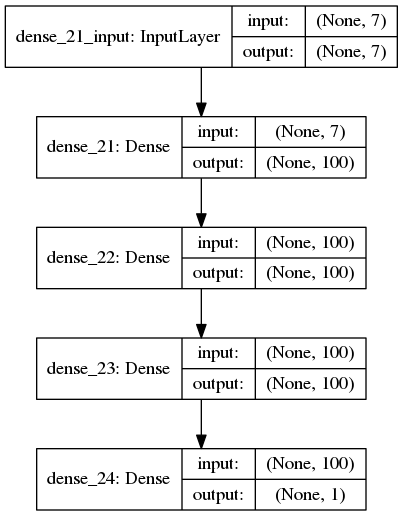

In [79]:
plot_model(Model6,show_shapes=True)

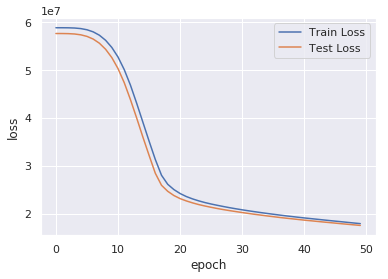

In [28]:
plt.plot(np.arange(50),Model6.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model6.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [29]:
print('Best Loss =',min(Model6.history.history['loss']))
print('Best Validation Loss =',min(Model6.history.history['val_loss']))


Best Loss = 17930074.817147855
Best Validation Loss = 17556470.962699823


In [30]:
Model7 = Sequential()
Model7.add(Dense(200,input_shape=(7,),activation='relu'))
Model7.add(Dense(200,activation='relu'))
Model7.add(Dense(200,activation='relu'))
Model7.add(Dense(1))
Model7.compile(loss='mae',optimizer='adam')
Model7.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 185us/step - loss: 58897986.3797 - val_loss: 57691048.0142
Epoch 2/50
2286/2286 [==============================] - 0s 114us/step - loss: 58888286.0122 - val_loss: 57662512.7815
Epoch 3/50
2286/2286 [==============================] - 0s 112us/step - loss: 58802807.2266 - val_loss: 57488214.2806
Epoch 4/50
2286/2286 [==============================] - 0s 116us/step - loss: 58457530.5092 - val_loss: 56918324.9165
Epoch 5/50
2286/2286 [==============================] - 0s 116us/step - loss: 57544321.4558 - val_loss: 55586324.2771
Epoch 6/50
2286/2286 [==============================] - 0s 112us/step - loss: 55635871.1356 - val_loss: 53009358.8206
Epoch 7/50
2286/2286 [==============================] - 0s 115us/step - loss: 52260156.4374 - val_loss: 48718542.6217
Epoch 8/50
2286/2286 [==============================] - 0s 112us/step - loss: 46917196.5879 - val_loss: 42339439.4742
Epoch 9/

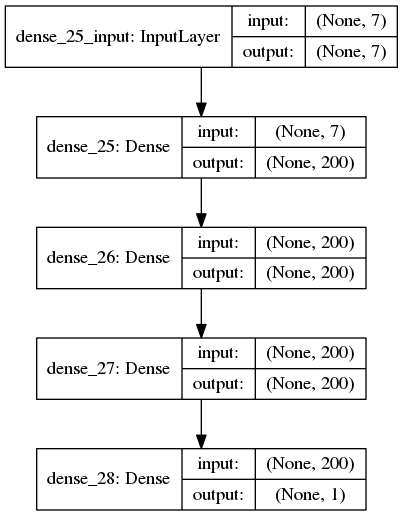

In [80]:
plot_model(Model7,show_shapes=True)

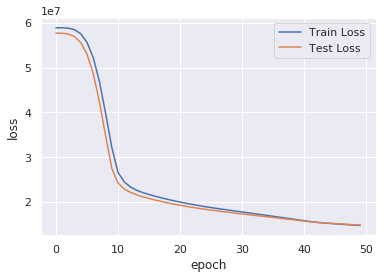

In [32]:
plt.plot(np.arange(50),Model7.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model7.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [33]:
print('Best Loss =',min(Model7.history.history['loss']))
print('Best Validation Loss =',min(Model7.history.history['val_loss']))


Best Loss = 14766540.31671041
Best Validation Loss = 14841652.156305507


In [34]:
Model8 = Sequential()
Model8.add(Dense(300,input_shape=(7,),activation='relu'))
Model8.add(Dense(300,activation='relu'))
Model8.add(Dense(300,activation='relu'))
Model8.add(Dense(1))
Model8.compile(loss='mae',optimizer='adam')
Model8.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 0s 184us/step - loss: 58897474.5722 - val_loss: 57688152.3410
Epoch 2/50
2286/2286 [==============================] - 0s 119us/step - loss: 58862746.1382 - val_loss: 57585073.4067
Epoch 3/50
2286/2286 [==============================] - 0s 128us/step - loss: 58553159.9685 - val_loss: 56952071.4600
Epoch 4/50
2286/2286 [==============================] - 0s 116us/step - loss: 57311645.3298 - val_loss: 54891000.2842
Epoch 5/50
2286/2286 [==============================] - 0s 119us/step - loss: 54047099.0621 - val_loss: 50142934.6785
Epoch 6/50
2286/2286 [==============================] - 0s 117us/step - loss: 47440535.6115 - val_loss: 41568205.4707
Epoch 7/50
2286/2286 [==============================] - 0s 122us/step - loss: 37458483.6045 - val_loss: 30997903.4600
Epoch 8/50
2286/2286 [==============================] - 0s 114us/step - loss: 28026513.1479 - val_loss: 24491091.3250
Epoch 9/

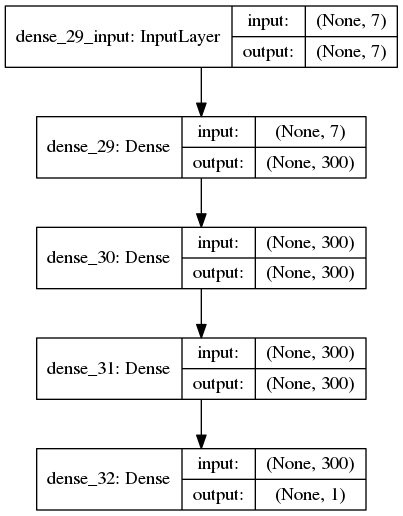

In [81]:
plot_model(Model8,show_shapes=True)

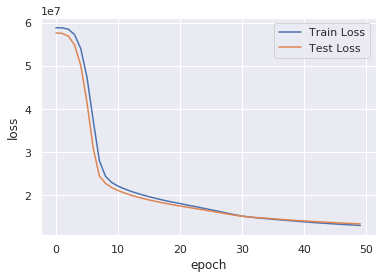

In [36]:
plt.plot(np.arange(50),Model8.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model8.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [37]:
print('Best Loss =',min(Model8.history.history['loss']))
print('Best Validation Loss =',min(Model8.history.history['val_loss']))


Best Loss = 13044303.287401576
Best Validation Loss = 13401604.696269982


In [38]:
Model9 = Sequential()
Model9.add(Dense(300,input_shape=(7,),activation='relu'))
Model9.add(Dense(300,activation='relu'))
Model9.add(Dense(300,activation='relu'))
Model9.add(Dense(300,activation='relu'))
Model9.add(Dense(300,activation='relu'))
Model9.add(Dense(1))
Model9.compile(loss='mae',optimizer='adam')
Model9.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 231us/step - loss: 58744740.0945 - val_loss: 56267650.7851
Epoch 2/50
2286/2286 [==============================] - 0s 134us/step - loss: 36260137.5451 - val_loss: 20736055.2824
Epoch 3/50
2286/2286 [==============================] - 0s 129us/step - loss: 19561410.9536 - val_loss: 17955587.2185
Epoch 4/50
2286/2286 [==============================] - 0s 136us/step - loss: 17218188.3316 - val_loss: 15966745.0231
Epoch 5/50
2286/2286 [==============================] - 0s 135us/step - loss: 15311813.5232 - val_loss: 15130042.4583
Epoch 6/50
2286/2286 [==============================] - 0s 131us/step - loss: 14480029.2874 - val_loss: 14209210.9556
Epoch 7/50
2286/2286 [==============================] - 0s 134us/step - loss: 13719007.2852 - val_loss: 13685959.0693
Epoch 8/50
2286/2286 [==============================] - 0s 134us/step - loss: 13138224.7682 - val_loss: 13243712.4192
Epoch 9/

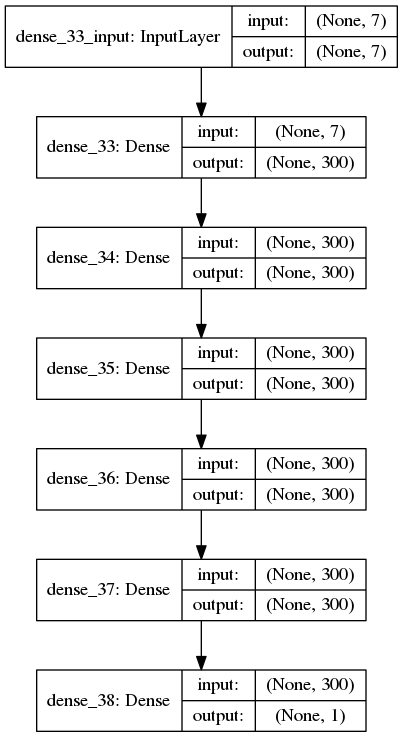

In [82]:
plot_model(Model9,show_shapes=True)

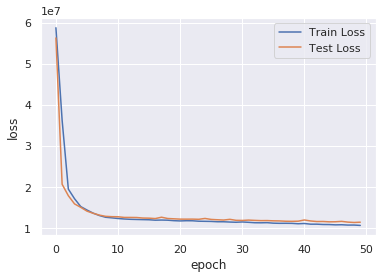

In [39]:
plt.plot(np.arange(50),Model9.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model9.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [40]:
print('Best Loss =',min(Model9.history.history['loss']))
print('Best Validation Loss =',min(Model9.history.history['val_loss']))


Best Loss = 10742462.73928259
Best Validation Loss = 11456842.607460035


In [41]:
Model10 = Sequential()
Model10.add(Dense(300,input_shape=(7,),activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(300,activation='relu'))
Model10.add(Dense(1))
Model10.compile(loss='mae',optimizer='adam')
Model10.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 278us/step - loss: 49768202.3412 - val_loss: 21111025.2007
Epoch 2/50
2286/2286 [==============================] - 0s 151us/step - loss: 18505901.5074 - val_loss: 16139645.6270
Epoch 3/50
2286/2286 [==============================] - 0s 147us/step - loss: 15253866.8303 - val_loss: 14608787.0409
Epoch 4/50
2286/2286 [==============================] - 0s 154us/step - loss: 13858792.5941 - val_loss: 13999202.4654
Epoch 5/50
2286/2286 [==============================] - 0s 152us/step - loss: 12903044.1610 - val_loss: 13109509.1794
Epoch 6/50
2286/2286 [==============================] - 0s 149us/step - loss: 12642815.4488 - val_loss: 13284691.3108
Epoch 7/50
2286/2286 [==============================] - 0s 150us/step - loss: 12486998.3351 - val_loss: 12845281.3002
Epoch 8/50
2286/2286 [==============================] - 0s 158us/step - loss: 12404796.6990 - val_loss: 12600731.7300
Epoch 9/

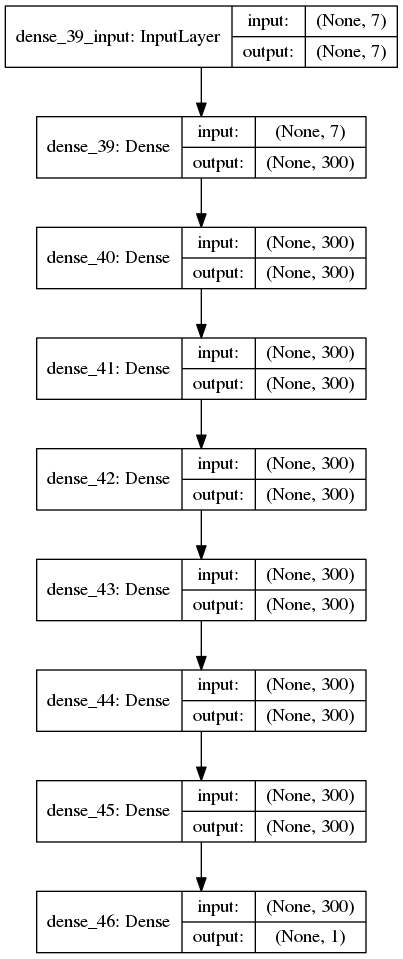

In [83]:
plot_model(Model10,show_shapes=True)

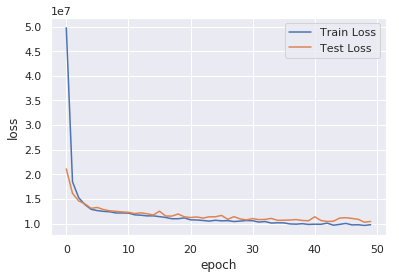

In [43]:
plt.plot(np.arange(50),Model10.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model10.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [44]:
print('Best Loss =',min(Model10.history.history['loss']))
print('Best Validation Loss =',min(Model10.history.history['val_loss']))


Best Loss = 9637670.657480314
Best Validation Loss = 10284532.454706928


In [45]:
Model11 = Sequential()
Model11.add(Dense(400,input_shape=(7,),activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(400,activation='relu'))
Model11.add(Dense(1))
Model11.compile(loss='mae',optimizer='adam')
Model11.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 290us/step - loss: 46544326.0052 - val_loss: 19934573.6199
Epoch 2/50
2286/2286 [==============================] - 0s 178us/step - loss: 17966018.9326 - val_loss: 15984526.3872
Epoch 3/50
2286/2286 [==============================] - 0s 171us/step - loss: 15210485.1059 - val_loss: 13944484.6181
Epoch 4/50
2286/2286 [==============================] - 0s 154us/step - loss: 13313134.8023 - val_loss: 13171295.7940
Epoch 5/50
2286/2286 [==============================] - 0s 156us/step - loss: 12755792.6938 - val_loss: 13346586.4796
Epoch 6/50
2286/2286 [==============================] - 0s 160us/step - loss: 12697704.1907 - val_loss: 12591007.9361
Epoch 7/50
2286/2286 [==============================] - 0s 157us/step - loss: 12174637.4199 - val_loss: 13452093.8472
Epoch 8/50
2286/2286 [==============================] - 0s 153us/step - loss: 12384137.9182 - val_loss: 12858749.8899
Epoch 9/

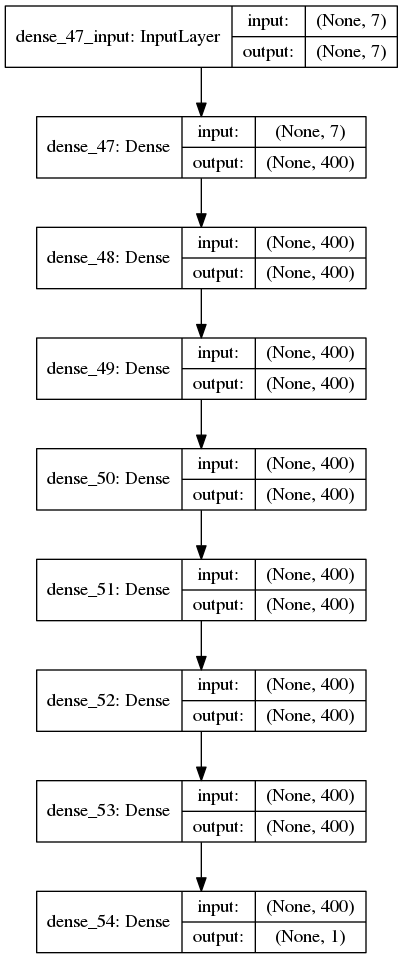

In [84]:
plot_model(Model11,show_shapes=True)

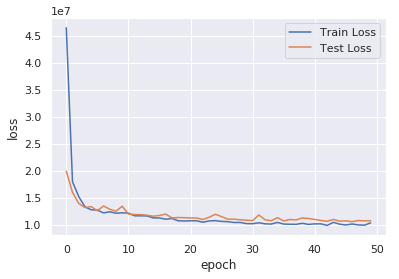

In [46]:
plt.plot(np.arange(50),Model11.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model11.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [47]:
print('Best Loss =',min(Model11.history.history['loss']))
print('Best Validation Loss =',min(Model11.history.history['val_loss']))


Best Loss = 9854829.588145232
Best Validation Loss = 10549011.047957372


In [48]:
Model12 = Sequential()
Model12.add(Dense(400,input_shape=(7,),activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(400,activation='relu'))
Model12.add(Dense(1))
Model12.compile(loss='mae',optimizer='adam')
Model12.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 338us/step - loss: 39124203.0936 - val_loss: 17990303.3819
Epoch 2/50
2286/2286 [==============================] - 0s 181us/step - loss: 15736674.3928 - val_loss: 14127435.6803
Epoch 3/50
2286/2286 [==============================] - 0s 176us/step - loss: 13527036.1522 - val_loss: 14190472.1137
Epoch 4/50
2286/2286 [==============================] - 0s 187us/step - loss: 12970809.3696 - val_loss: 13229744.1421
Epoch 5/50
2286/2286 [==============================] - 0s 198us/step - loss: 12341470.0280 - val_loss: 12729541.7762
Epoch 6/50
2286/2286 [==============================] - 0s 183us/step - loss: 12234946.3193 - val_loss: 14015652.1705
Epoch 7/50
2286/2286 [==============================] - 0s 178us/step - loss: 13273392.0875 - val_loss: 12295006.1741
Epoch 8/50
2286/2286 [==============================] - 0s 182us/step - loss: 12519860.4348 - val_loss: 12632672.2202
Epoch 9/

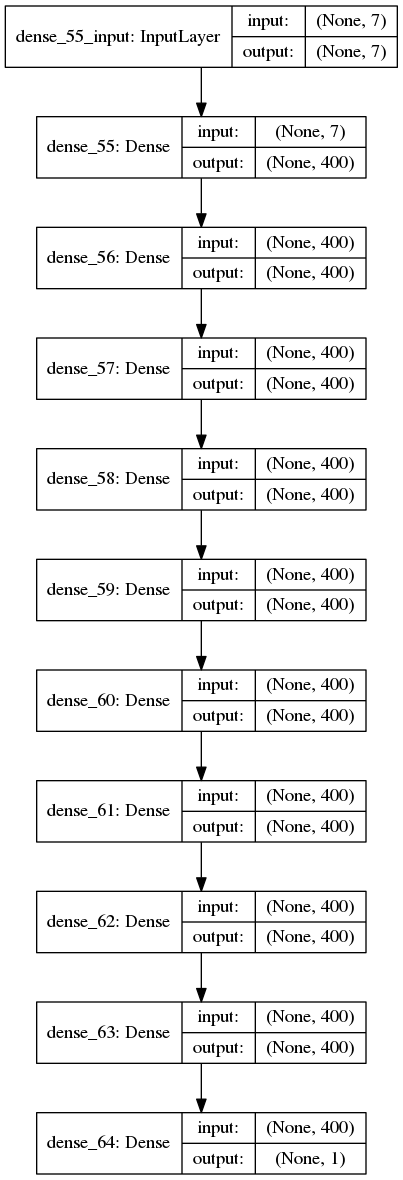

In [85]:
plot_model(Model12,show_shapes=True)

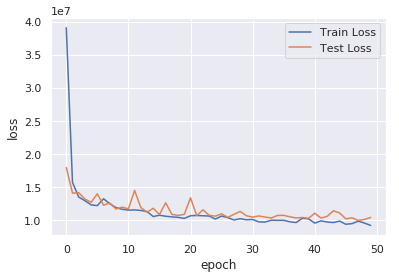

In [49]:
plt.plot(np.arange(50),Model12.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model12.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [50]:
print('Best Loss =',min(Model12.history.history['loss']))
print('Best Validation Loss =',min(Model12.history.history['val_loss']))


Best Loss = 9240507.233158356
Best Validation Loss = 9996139.584369449


In [51]:
Model13 = Sequential()
Model13.add(Dense(400,input_shape=(7,),activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(400,activation='relu'))
Model13.add(Dense(1))
Model13.compile(loss='mae',optimizer='adam')
Model13.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 443us/step - loss: 36696770.1802 - val_loss: 17578095.2469
Epoch 2/50
2286/2286 [==============================] - 1s 238us/step - loss: 16865221.4339 - val_loss: 15109802.9627
Epoch 3/50
2286/2286 [==============================] - 0s 193us/step - loss: 14150866.2458 - val_loss: 14732936.6465
Epoch 4/50
2286/2286 [==============================] - 0s 193us/step - loss: 13125943.3788 - val_loss: 12829151.5453
Epoch 5/50
2286/2286 [==============================] - 0s 195us/step - loss: 12534704.7113 - val_loss: 15163132.1066
Epoch 6/50
2286/2286 [==============================] - 0s 190us/step - loss: 13231915.6903 - val_loss: 12414368.5044
Epoch 7/50
2286/2286 [==============================] - 0s 197us/step - loss: 11968685.6325 - val_loss: 11998586.5506
Epoch 8/50
2286/2286 [==============================] - 0s 193us/step - loss: 12119195.2410 - val_loss: 11434895.3464
Epoch 9/

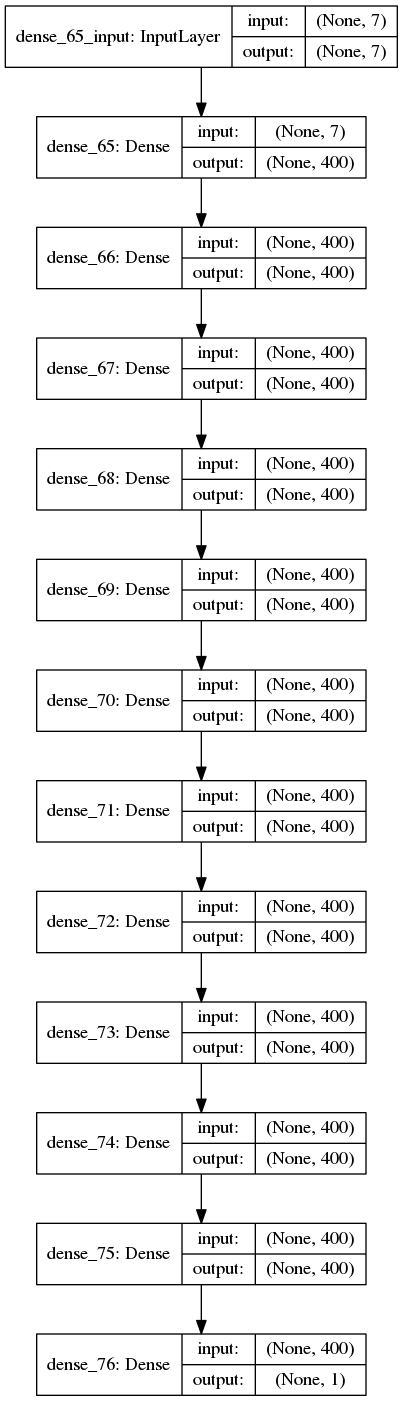

In [86]:
plot_model(Model13,show_shapes=True)

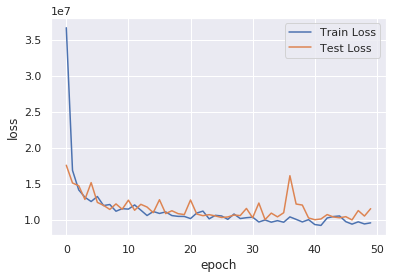

In [52]:
plt.plot(np.arange(50),Model13.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model13.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [53]:
print('Best Loss =',min(Model13.history.history['loss']))
print('Best Validation Loss =',min(Model13.history.history['val_loss']))

Best Loss = 9210728.405949255
Best Validation Loss = 9975309.040852575


In [54]:
Model14 = Sequential()
Model14.add(Dense(500,input_shape=(7,),activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(500,activation='relu'))
Model14.add(Dense(1))
Model14.compile(loss='mae',optimizer='adam')
Model14.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 382us/step - loss: 34142771.2450 - val_loss: 19459310.6288
Epoch 2/50
2286/2286 [==============================] - 0s 193us/step - loss: 15641968.0184 - val_loss: 14292452.2913
Epoch 3/50
2286/2286 [==============================] - 0s 195us/step - loss: 13350911.9016 - val_loss: 12802698.6004
Epoch 4/50
2286/2286 [==============================] - 0s 194us/step - loss: 13223507.2100 - val_loss: 12972609.2575
Epoch 5/50
2286/2286 [==============================] - 0s 196us/step - loss: 12728859.5433 - val_loss: 12549722.5151
Epoch 6/50
2286/2286 [==============================] - 0s 192us/step - loss: 12544957.0096 - val_loss: 12050666.8490
Epoch 7/50
2286/2286 [==============================] - 0s 200us/step - loss: 12039257.2616 - val_loss: 13462920.7744
Epoch 8/50
2286/2286 [==============================] - 0s 192us/step - loss: 11908905.0420 - val_loss: 11834022.6288
Epoch 9/

In [ ]:
plot_model(Model14,show_shapes=True)

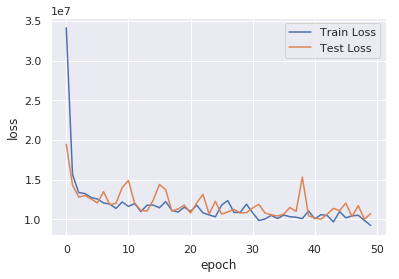

In [55]:
plt.plot(np.arange(50),Model14.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model14.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [56]:
print('Best Loss =',min(Model14.history.history['loss']))
print('Best Validation Loss =',min(Model14.history.history['val_loss']))

Best Loss = 9212032.912073491
Best Validation Loss = 9991942.863232682


In [57]:
Model15 = Sequential()
Model15.add(Dense(550,input_shape=(7,),activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(550,activation='relu'))
Model15.add(Dense(1))
Model15.compile(loss='mae',optimizer='adam')
Model15.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 484us/step - loss: 31153412.6422 - val_loss: 16401124.2842
Epoch 2/50
2286/2286 [==============================] - 1s 252us/step - loss: 15230632.7835 - val_loss: 14530339.9432
Epoch 3/50
2286/2286 [==============================] - 0s 205us/step - loss: 15004704.1137 - val_loss: 12992026.2380
Epoch 4/50
2286/2286 [==============================] - 0s 213us/step - loss: 13145303.9278 - val_loss: 12787785.3641
Epoch 5/50
2286/2286 [==============================] - 0s 193us/step - loss: 12930259.9633 - val_loss: 14566577.8544
Epoch 6/50
2286/2286 [==============================] - 0s 193us/step - loss: 12986173.4261 - val_loss: 11750025.9112
Epoch 7/50
2286/2286 [==============================] - 0s 201us/step - loss: 12381122.2108 - val_loss: 11484906.8632
Epoch 8/50
2286/2286 [==============================] - 0s 195us/step - loss: 12428890.5359 - val_loss: 12204970.2096
Epoch 9/

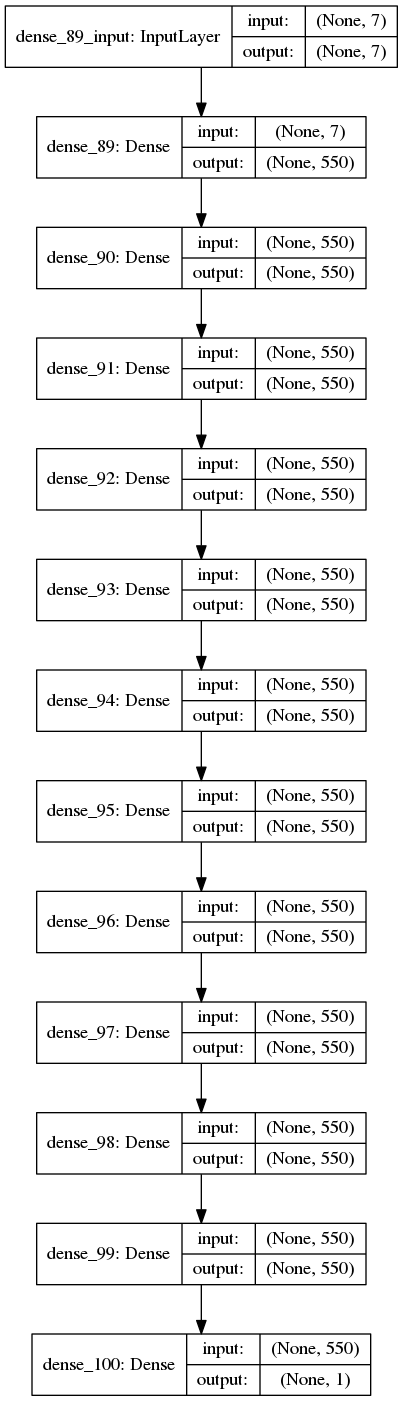

In [87]:
plot_model(Model15,show_shapes=True)

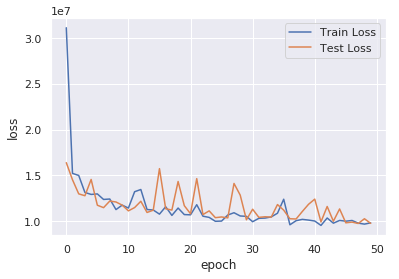

In [58]:
plt.plot(np.arange(50),Model15.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model15.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [59]:
print('Best Loss =',min(Model15.history.history['loss']))
print('Best Validation Loss =',min(Model15.history.history['val_loss']))

Best Loss = 9541927.367454069
Best Validation Loss = 9752106.053285968


In [60]:
Model16 = Sequential()
Model16.add(Dense(300,input_shape=(7,),activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(550,activation='relu'))
Model16.add(Dense(300,activation='relu'))
Model16.add(Dense(1))
Model16.compile(loss='mae',optimizer='adam')
Model16.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 2286 samples, validate on 1126 samples
Epoch 1/50
2286/2286 [==============================] - 1s 376us/step - loss: 32158639.3263 - val_loss: 19595439.3250
Epoch 2/50
2286/2286 [==============================] - 0s 195us/step - loss: 17463958.2870 - val_loss: 14673276.6394
Epoch 3/50
2286/2286 [==============================] - 0s 196us/step - loss: 13481480.8259 - val_loss: 14405969.4778
Epoch 4/50
2286/2286 [==============================] - 0s 200us/step - loss: 15092573.7437 - val_loss: 14557808.7744
Epoch 5/50
2286/2286 [==============================] - 1s 258us/step - loss: 13225200.6850 - val_loss: 13248839.0266
Epoch 6/50
2286/2286 [==============================] - 0s 200us/step - loss: 12405317.4567 - val_loss: 11798484.1421
Epoch 7/50
2286/2286 [==============================] - 0s 201us/step - loss: 13014695.2992 - val_loss: 11971506.4654
Epoch 8/50
2286/2286 [==============================] - 1s 234us/step - loss: 12369493.0971 - val_loss: 15170060.6394
Epoch 9/

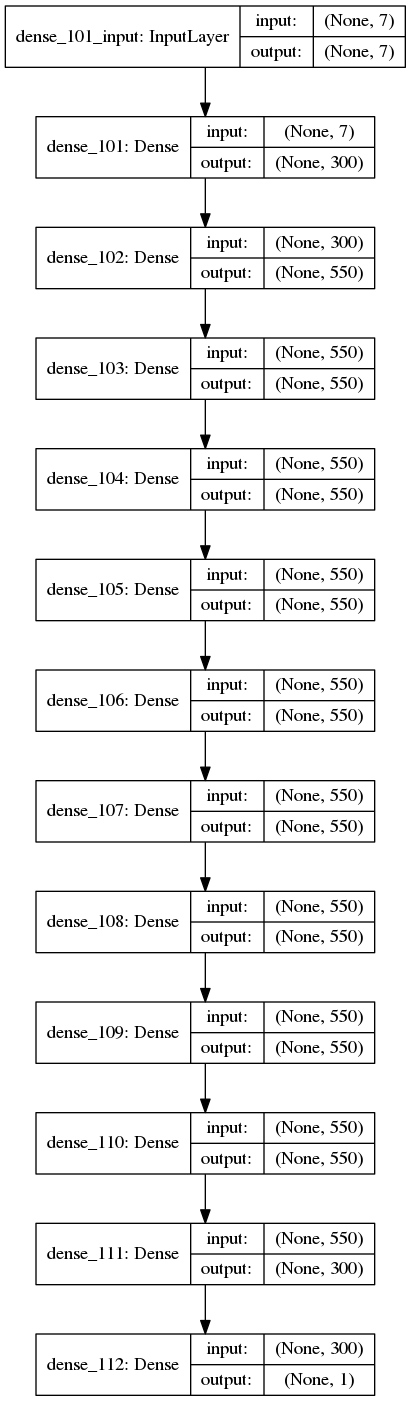

In [89]:
plot_model(Model16,show_shapes=True)

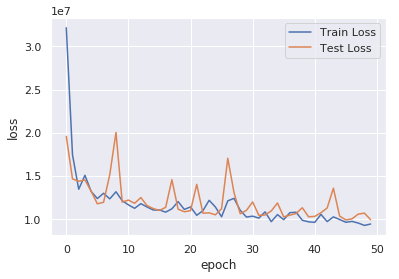

In [61]:
plt.plot(np.arange(50),Model16.history.history['loss'],label='Train Loss')
plt.plot(np.arange(50),Model16.history.history['val_loss'],label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [63]:
print('Best Loss =',min(Model16.history.history['loss']))
print('Best Validation Loss =',min(Model16.history.history['val_loss']))

Best Loss = 9297325.534995625
Best Validation Loss = 9927056.15275311
